# Average Spectrum Conversion as a Visual Gallery?

In [1]:
from dlcliche.notebook import *
from dlcliche.image import *
from lib_fat2019 import *
from domain_freq_xfer import *

#plt_looks_good()

# Folders
conf.DATA = Path('/mnt/dataset/freesound-audio-tagging-2019')
conf.ROOT = Path('/mnt/dataset/fat2019_files')
conf.WORK = Path('/mnt/dataset/work/fat2019')
update_conf(conf)

## Analyze average spectrum

Average spectrum here is the mean frequency bins over time axis of spectrogram.

In [3]:
Xsrc = load_pkl(conf.MELSP_TRN_NOISY_SINGLE)
ysrc = pd.read_csv(conf.CSV_TRN_NOISY_SINGLE).labels
Xdest = load_pkl(conf.MELSP_TRN_CURATED)
ydest = pd.read_csv(conf.CSV_TRN_CURATED).labels
classes = get_classes(conf)

dom_freq_xfer = DomainFreqTransfer(classes)
dom_freq_xfer.fit(Xdest, ydest, src_domain_X=Xsrc, src_domain_ml_y=ysrc)

Average spectrums shown below is calculated over all class samples from each dataset.

As you can see:

- _`src`_ noisy set is quite different from _`dest`_ curated envelope.
- Musical instrument sounds seems to be similar but still has differences.

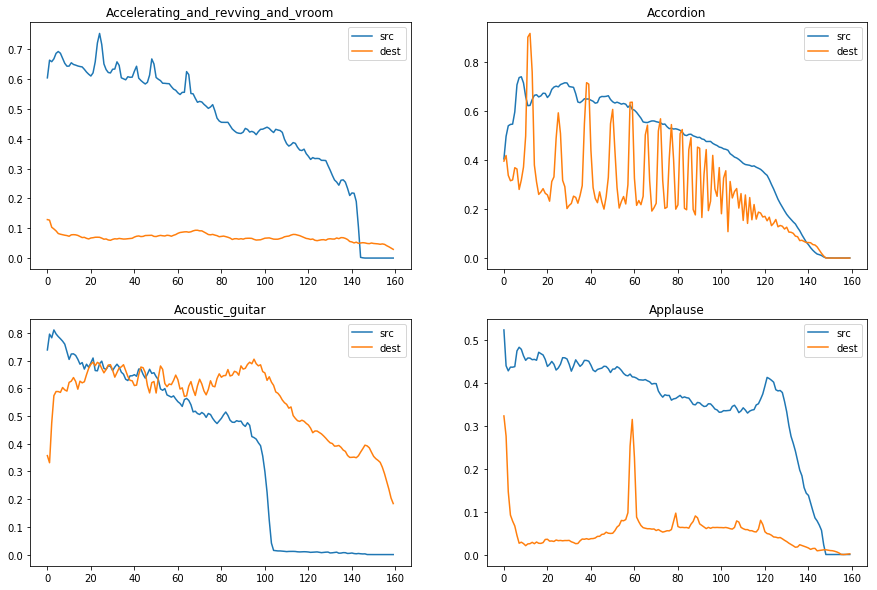

In [10]:
for ci, ax in enumerate(subplot_matrix(columns=2, rows=2, figsize=(15,10))):
    ax.plot(dom_freq_xfer.src_freq_envs[ci]/255, label='src')
    ax.plot(dom_freq_xfer.dest_freq_envs[ci]/255, label='dest')
    ax.legend()
    ax.set_title(classes[ci])

## Convert average spectrum from noisy to curated domain

- All samples from noisy set is converted as follows.
- Frequency bins where average amplitude is larger than curated's are linearly reduced by multiplying coefficients, so that average of these frequency bins fit to curated's.
- Frequenciy bins where average amplitude is lower than curated's are kept as they are, this is a workaround to avoid difficulty to amplify very low values to desired amplitude.

_`src`_ is noisy set envelope, _`dest`_ is curated's, and _`mapped`_ is envelope mapped from noisy to curated according to the design above.

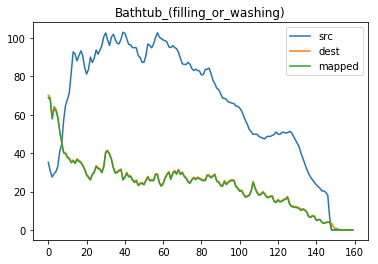

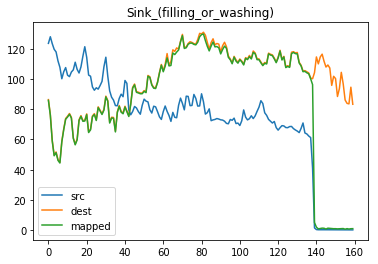

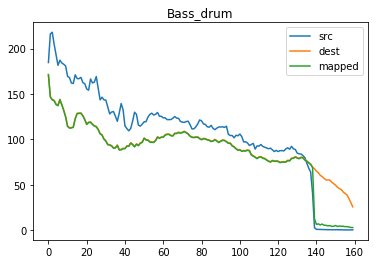

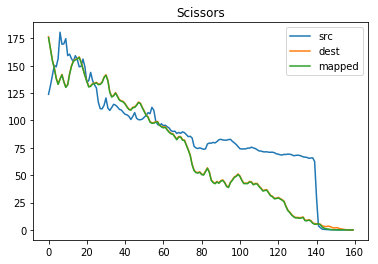

In [11]:
dom_freq_xfer(Xsrc, ysrc, show_samples=4)

## Examples of samples

These examples show that the conversion has to be improved.

- Patterns became invisible in sample no.1, 4 and 5. It bad signs.
- Though no.2 made patterns clear, this is a good sign.

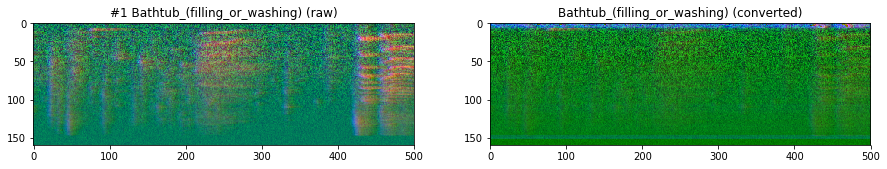

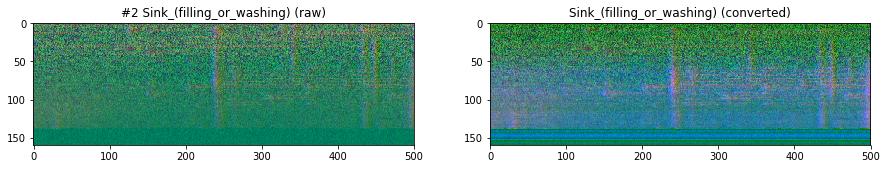

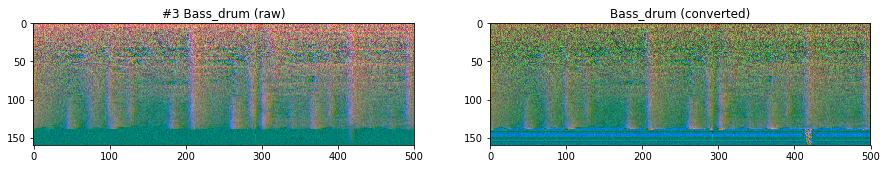

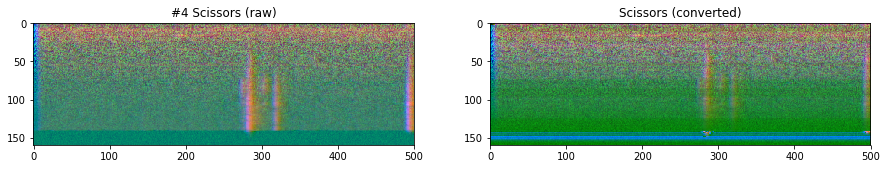

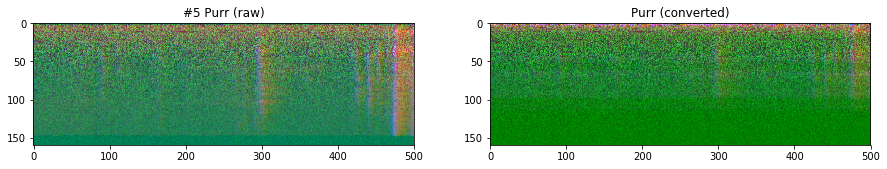

In [20]:
#OrgXsrc = load_pkl(conf.MELSP_TRN_NOISY_SINGLE)
DISP_DURATION = 500
for i in range(5):
    axs = list(subplot_matrix(columns=2, rows=1, figsize=(15,5)))
    axs[0].imshow(OrgXsrc[i][:, :DISP_DURATION, :])
    axs[1].imshow(Xsrc[i][:, :DISP_DURATION, :])
    axs[0].set_title(f'#{i+1} ' + ysrc[i] + ' (raw)')
    axs[1].set_title(ysrc[i] + ' (converted)')